In [3]:
library(reshape2)
library(tidyverse)
library(ggplot2)
library(plotly)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [4]:
#Read in data/wrangle
game <- readr::read_csv(here::here('data', 'vgsales.csv'))
game_melt <- melt(data=game,id.vars = c("Rank","Name","Platform","Year","Genre","Publisher"),measure.vars=c("NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"))
game_melt$Year <- as.integer(game_melt$Year)
colnames(game_melt)[7] <- "Region"
colnames(game_melt)[8] <- "Copies Sold"

#game_melt <- tidyr::gather(game, key = "Region", value = "Sales", NA_Sales, EU_Sales, Global_Sales, JP_Sales, Other_Sales)
#genre_sales <- aggregate(Global_Sales ~ Genre, game, sum)
#sorted_genre_totalsales <- genre_sales[order(-genre_sales$Global_Sales),]$Genre

#Data wrangling
sales_data <- game_melt[!(game_melt$Region=="Global_Sales"),]
#sales_data_platform <- aggregate(Sales ~ Platform+Year+Genre+Region, game_melt, sum)
#sales_data_publisher <- aggregate(Sales ~ Publisher+Year+Genre+Region, game_melt, sum)
top_game_init <- game_melt %>% #Initialize Top Game Card (Tab3)
    group_by(Name) %>%
    summarise("Copies Sold" = sum(`Copies Sold`)) %>%
    subset(`Copies Sold`== max(`Copies Sold`))

top_genre_init <- game_melt %>% #Initialize Top Genre Card (Tab3)
    group_by(Genre) %>%
    summarise("Copies Sold" = sum(`Copies Sold`)) %>%
    subset(`Copies Sold`== max(`Copies Sold`))

top_platform_init <- game_melt %>% #Initialize Top Platform Card (Tab3)
    group_by(Platform) %>%
    summarise("Copies Sold" = sum(`Copies Sold`)) %>%
    subset(`Copies Sold`== max(`Copies Sold`))

top_publisher_init <- game_melt %>% #Initialize Top Publisher Card (Tab3)
    group_by(Publisher) %>%
    summarise("Copies Sold" = sum(`Copies Sold`)) %>%
    subset(`Copies Sold`== max(`Copies Sold`))

#Nested Lists for Filters
platform_filter <- unique(game$Platform) %>%
    purrr::map(function(col) list(label = col, value = col))
platform_filter <- append(platform_filter,list(list(label="All",value="all")))

genre_filter <- unique(game$Genre) %>%
    purrr::map(function(col) list(label = col, value = col))
genre_filter <- append(genre_filter,list(list(label="All",value="all")))

publisher_filter <- unique(game$Publisher) %>%
    purrr::map(function(col) list(label = col, value = col))
publisher_filter <- append(publisher_filter,list(list(label="All",value="all")))


── Column specification ────────────────────────────────────────────────────────
cols(
  Rank = col_double(),
  Name = col_character(),
  Platform = col_character(),
  Year = col_character(),
  Genre = col_character(),
  Publisher = col_character(),
  NA_Sales = col_double(),
  EU_Sales = col_double(),
  JP_Sales = col_double(),
  Other_Sales = col_double(),
  Global_Sales = col_double()
)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [7]:
install.packages("rasterly")

Installing package into ‘/home/aamir/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [8]:
library(rasterly)

Loading required package: Rcpp



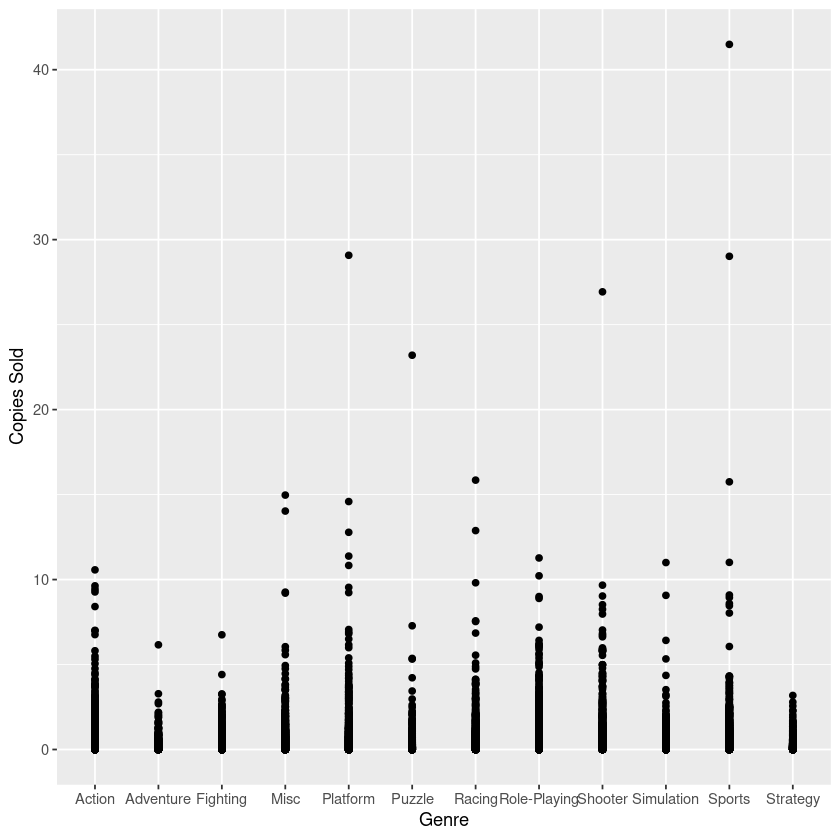

In [11]:
sales_data %>% 
    ggplot() +
    aes(x=Genre, y=`Copies Sold`) + 
    geom_point()

In [12]:
sales_data %>% 
  plotRasterly(mapping = aes(x = Genre, y = `Copies Sold`)) %>% 
  rasterly_points()

ERROR: Error in get_range(x_range = x_range, y_range = y_range, x = aesthetics$x, : x_range should be a vector of type numeric with a length of 2.


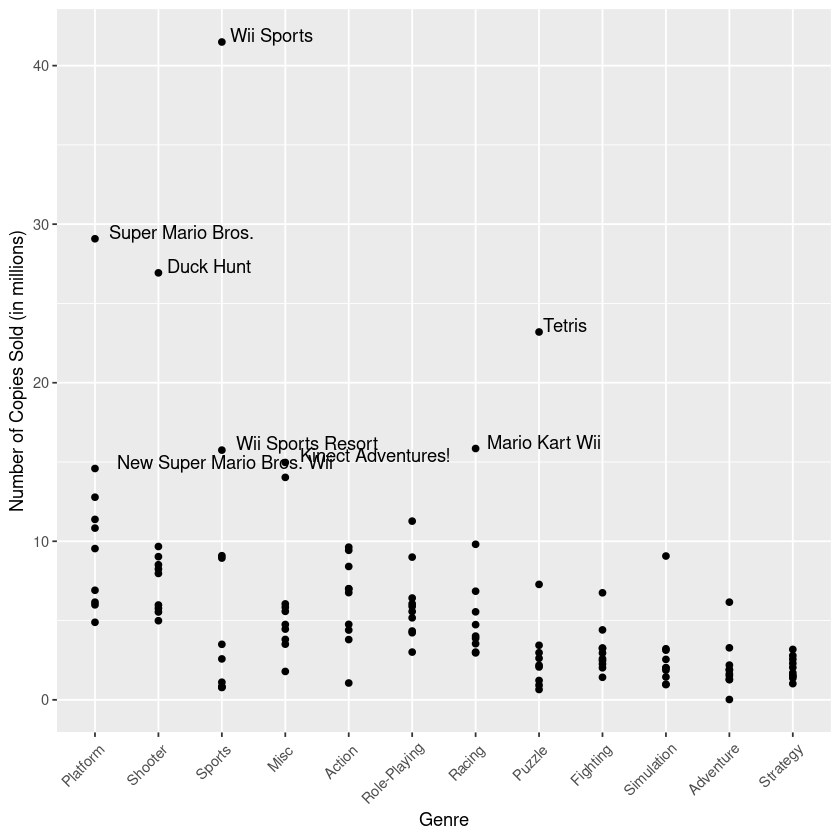

In [20]:
sales_sub %>% 
    ggplot() +
    aes(x=reorder(Genre,-`Copies Sold`), y=`Copies Sold`) + 
    geom_point() +
    geom_text(aes(label=ifelse(`Copies Sold`>max(`Copies Sold`)*0.35,as.character(Name),'')),hjust=-0.1, vjust=0) +
    theme(axis.text.x = element_text(angle=45, hjust=0.9, vjust=0.9))+
    ylab("Number of Copies Sold (in millions)") +
    xlab("Genre")

In [19]:
require(data.table)
sales_sub <- data.table(sales_data, key="Genre")[, head(.SD, 10), by=Genre]

In [14]:
sales_data

,Rank,Name,Platform,Year,Genre,Publisher,Region,Copies Sold
,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<fct>,<dbl>
1,1,Wii Sports,Wii,2006,Sports,Nintendo,NA_Sales,41.49
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,NA_Sales,29.08
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,NA_Sales,15.85
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,NA_Sales,15.75
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,NA_Sales,11.27
6,6,Tetris,GB,1989,Puzzle,Nintendo,NA_Sales,23.20
7,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,NA_Sales,11.38
8,8,Wii Play,Wii,2006,Misc,Nintendo,NA_Sales,14.03
9,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,NA_Sales,14.59
